In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import numpy as np

In [2]:
adata = sc.read_h5ad('CRC_lin4_spatial.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 2139961 × 908
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_ID', 'fov', 'Area', 'TMA', 'Subject_ID', 'Treatment_Status', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_genes', 'Lineage_level2', 'Lineage_level1', 'Lineage_level3', 'Lineage_level4'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts', 'n_cells'
    uns: 'Lineage_level3_colors', 'Lineage_level4_colors', 'log1p', 'neighbors_30', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'log_norm', 'norm_counts', 'raw_counts'
    obsp: 'neighbors_30_connectivities', 'neighbors_30_distances'

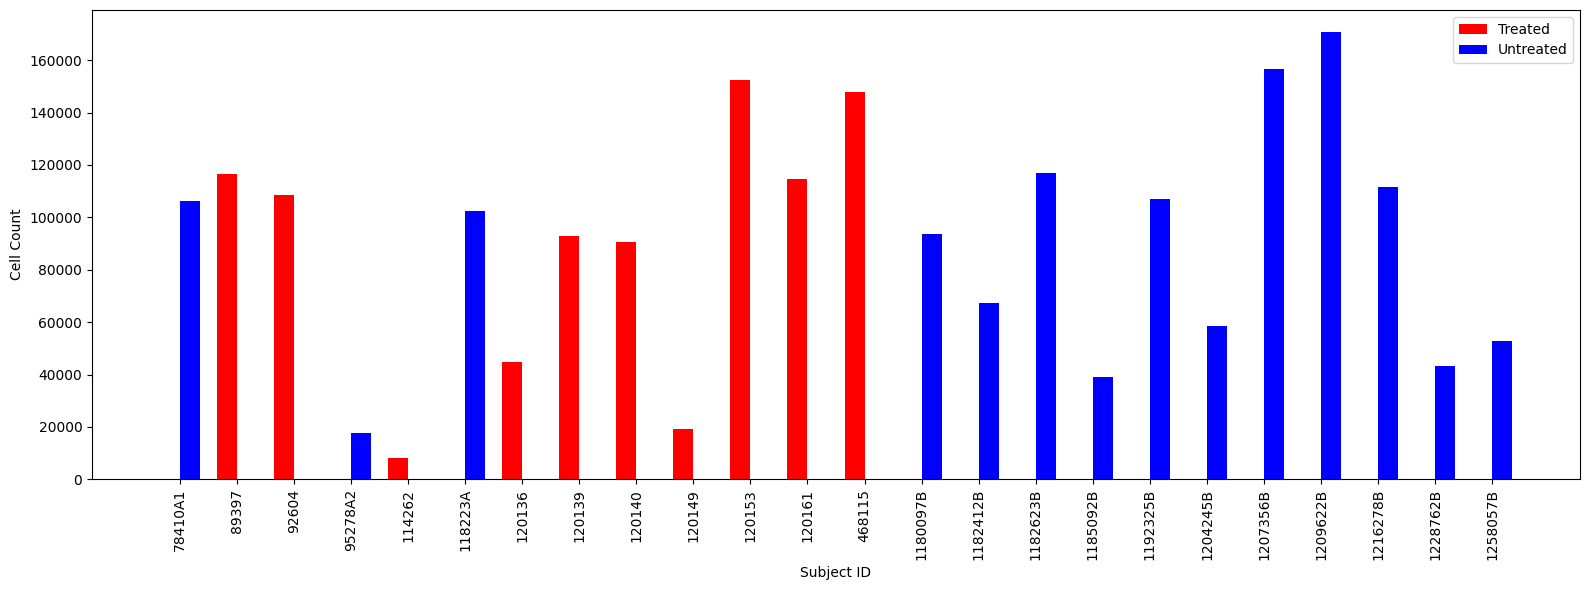

In [4]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt


df = adata.obs[["Subject_ID", "Treatment_Status"]].copy()

cell_counts = df.groupby(["Subject_ID", "Treatment_Status"]).size().reset_index(name="Cell_Count")

cell_counts = cell_counts.sort_values("Subject_ID")

treated = cell_counts[cell_counts["Treatment_Status"] == "Treated"]
untreated = cell_counts[cell_counts["Treatment_Status"] == "Untreated"]

x = cell_counts["Subject_ID"].unique()
x_idx = range(len(x))

treated_dict = dict(zip(treated["Subject_ID"], treated["Cell_Count"]))
untreated_dict = dict(zip(untreated["Subject_ID"], untreated["Cell_Count"]))

treated_vals = [treated_dict.get(s, 0) for s in x]
untreated_vals = [untreated_dict.get(s, 0) for s in x]

plt.figure(figsize=(16, 6))
width = 0.35

plt.bar([i - width/2 for i in x_idx], treated_vals, width, label='Treated', color='red')
plt.bar([i + width/2 for i in x_idx], untreated_vals, width, label='Untreated', color='blue')

plt.xticks(x_idx, x, rotation=90)
plt.ylabel("Cell Count")
plt.xlabel("Subject ID")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
adata.obs['Lineage_level1'].nunique()

In [ ]:
X = adata.X
zero_fraction = 1 - (X.count_nonzero() / np.prod(X.shape))
print(f"Sparsity: {zero_fraction*100:.2f}%")